#Part 1: Purpose of the Project:
1. Utilize NLP techniques to manage and analyze textual information.
2. Conduct initial data analysis and generate visual representations in the form of Word Clouds.
3. Use the Natural Language Toolkit (NLTK) for breaking down text into individual elements or tokens.
4. Implement feature extraction by employing a Count Vectorizer method.
5. Comprehend the principles behind the Naive Bayes algorithm, including the distinctions among marginal likelihood, likelihood, and prior probability in statistical terms.
6. Train classifiers based on Naive Bayes and Logistic Regression using the scikit-learn library to predict outcomes from textual datasets.

In retail companies, Natural Language Processing helps build predictive models to perform sentiment analysis based on social media posts/reviews, and assess if customers are satisfied with a product or not. NLP encodes words to numbers and trains a model to make corresponding predictions. As a result, we can easily assess how customers felt about a product without manually checking a large number of reviews.

Generally, NLP can work with input data in image, video, and text formats. In this project, we will perform sentiment analysis on textual data.

We have vast data on product reviews in text format. We would like to predict whether or not customers are satisfied with the product.



#Part 2: Import Relevant Libraries, Packages, and Datasets

In [ ]:
#Import key libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Our data has the ratings (as in number of starts), the date of review, the variations of the product sold, the verified customer reviews of the product, and the feedback column of values 1 (if ratings are >=4) and 0 (if ratings are <= 2)

In [ ]:
#Load the reviews dataset
#Since we have a dataset in .tsv format, we will use the separator as \t to divide the contents into different columns based on tab difference
reviews = pd.read_csv('/content/amazon_alexa.tsv', sep = '\t')
reviews

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
reviews.info() #we have one null value in the verified_reviews column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
reviews.describe() #Since the rating mean is around 4.5, the product is generally pretty good!
#the feedback is also almost 1 on average, which also conveys the same.

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
#Let's take a look at the verified_reviews column
reviews['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

#Part 3: Perform Exploratory Data Analysis

First we will plot a heatmap to get an idea as to whether we have any missing data.

<Axes: >

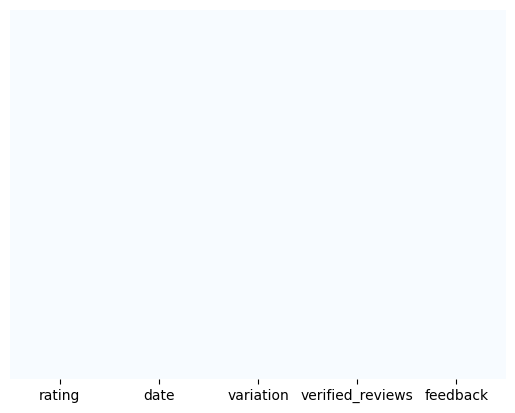

In [ ]:
sns.heatmap(reviews.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')
#We don't seem to have any null values in the given heatmap

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

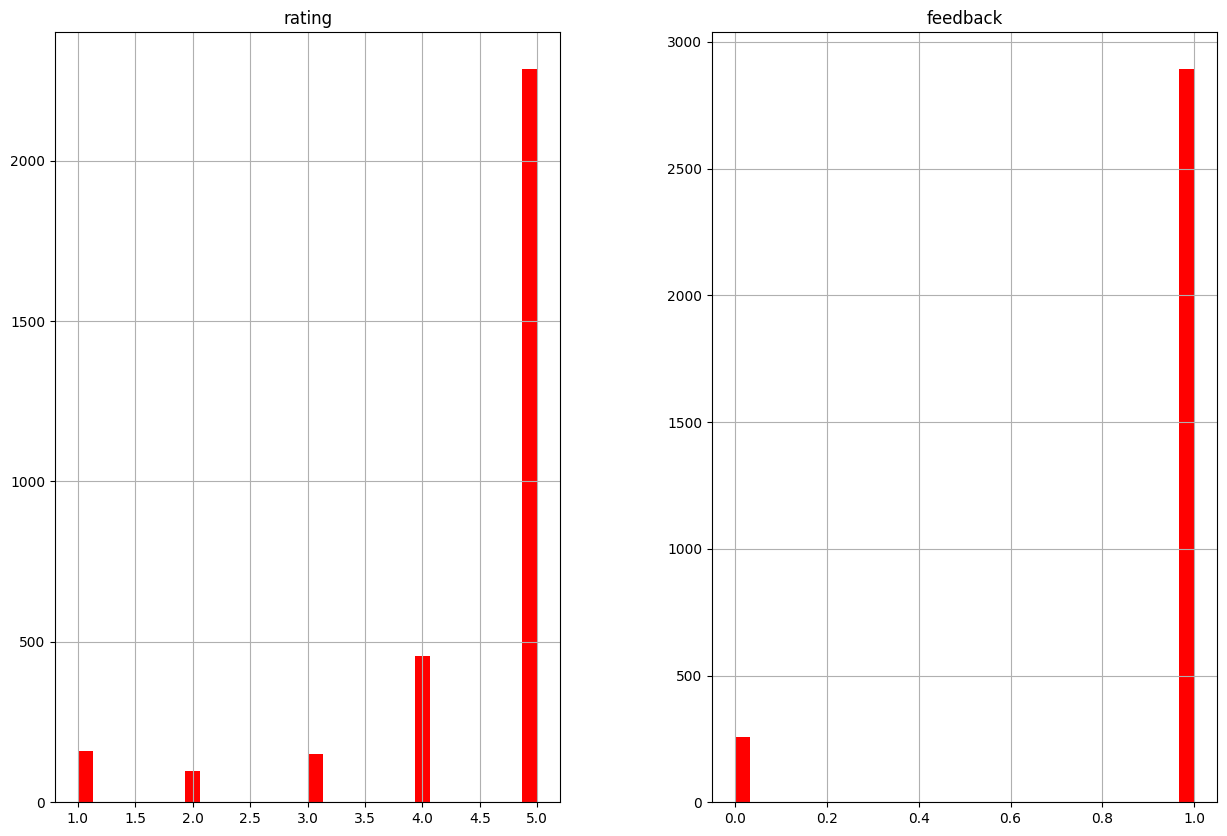

In [ ]:
#Let's plot a histogram next, with bins = 30
reviews.hist(bins = 30, figsize = (15,10), color = 'r')
#So, we are around 2900 positive reviews and around 250-300 negative reviews.
#Most reviews are 5 star, followed by a 4 star, 3 star, 2 star, and 1 star reviews.

In [ ]:
#Let's check the length of our reviews. So, we will see how many words and characters we have in our reviews.
reviews['length'] = reviews['verified_reviews'].astype(str).apply(len)
reviews.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

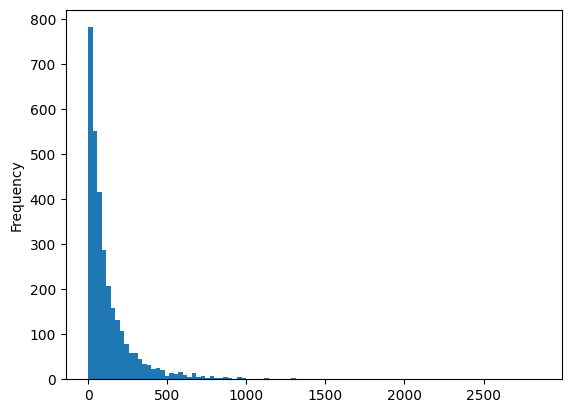

In [ ]:
#Plot histogram of length:
reviews['length'].plot(bins = 100, kind = 'hist')
#Most reviews are pretty short. There are some reviews that have even more 1000 characters!

In [ ]:
#Let's print the longest message, the shortest message, and the message with the mean number of characters
#Let's check the maximum, minimum, and mean values first:
reviews['length'].describe()

count    3150.000000
mean      132.049206
std       182.100176
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [ ]:
#Let's see the longest review:
longest_review = reviews[reviews['length'] == reviews['length'].max()]['verified_reviews'].iloc[0]
longest_review

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [ ]:
#shortest review
shortest_review = reviews[reviews['length'] == reviews['length'].min()]['verified_reviews'].iloc[0]
shortest_review

'😍'

In [ ]:
# Calculate the mean length
mean_length_value = reviews['length'].mean()

# Find the review closest to the mean length
closest_review_index = (reviews['length'] - mean_length_value).abs().idxmin()
closest_review = reviews.loc[closest_review_index]['verified_reviews']

print(closest_review)

Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.


Let's explore the positive and negative reviews. By doing so, we will create two separate dataframes with the positive and negative reviews respectively.

In [ ]:
positive_reviews = reviews[reviews['feedback'] == 1]
negative_reviews = reviews[reviews['feedback'] == 0]

In [ ]:
positive_reviews

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [ ]:
negative_reviews

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


<ipython-input-142-dcc521a8c6e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'feedback', data = reviews, label = 'Count', palette = 'deep')


<Axes: xlabel='feedback', ylabel='count'>

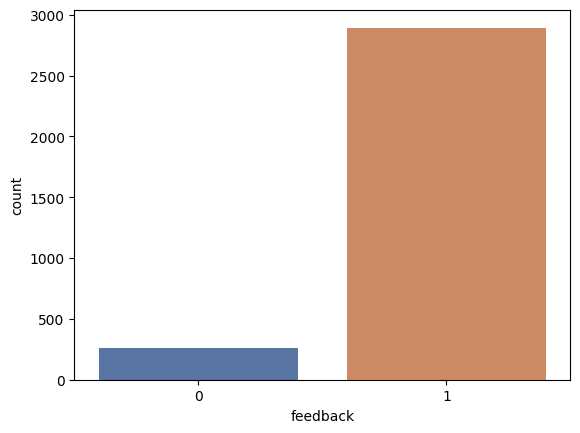

In [ ]:
#Let's verify by looking at the counts of positive and negative reviews, based on feedback
sns.countplot(x = 'feedback', data = reviews, label = 'Count', palette = 'deep')

<ipython-input-143-ff60a06fb306>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'rating', data = reviews, label = 'Count', palette = 'deep')


<Axes: xlabel='rating', ylabel='count'>

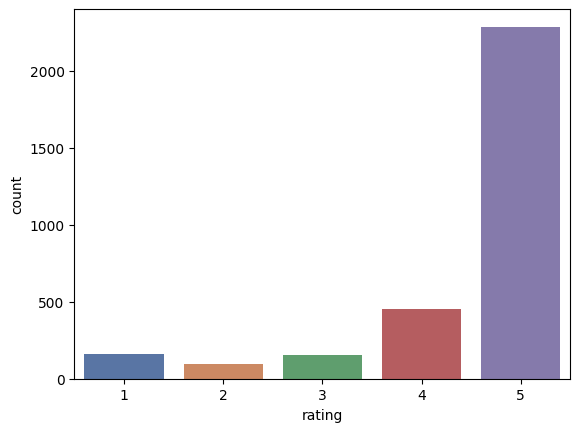

In [ ]:
##Let's verify by looking at the counts of positive and negative reviews, based on ratinngs
sns.countplot(x = 'rating', data = reviews, label = 'Count', palette = 'deep')
#Most reviews are in 4 and 5 stars, so the number of reviews stay around the same, as per feedback

<ipython-input-144-27dbfe7c0206>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'feedback', data = reviews, palette = 'deep')


<Axes: xlabel='variation', ylabel='feedback'>

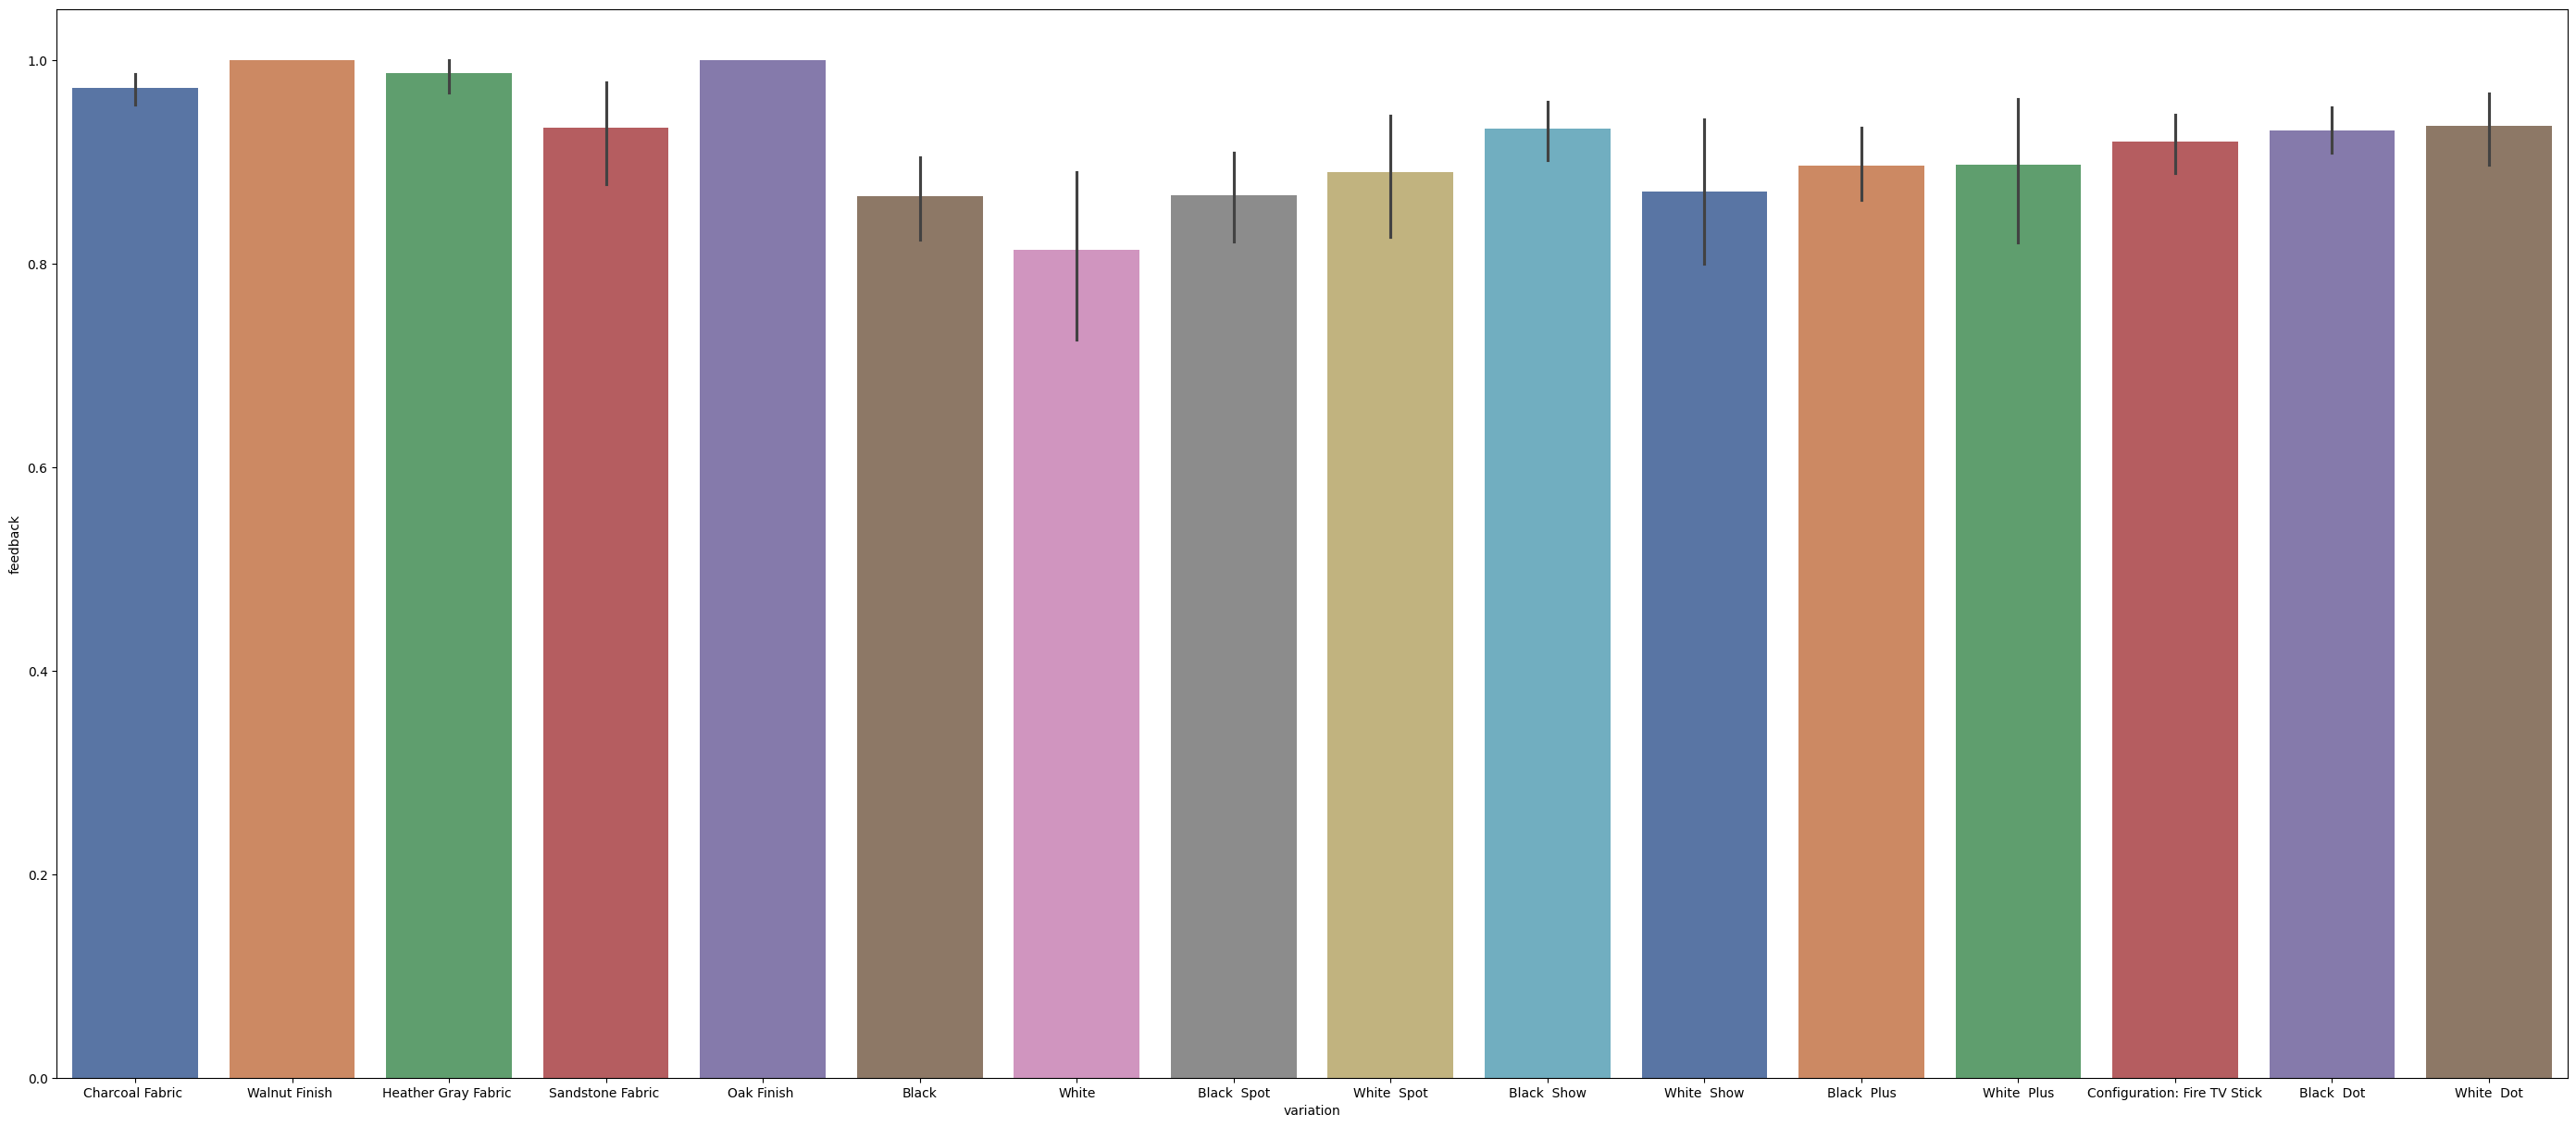

In [ ]:
#Let's assess whether there is a relationship between variation and feedback/ratings
#This would help us understand the kind of variations in the product that people like more
plt.figure(figsize = (35,15))
sns.barplot(x = 'variation', y = 'feedback', data = reviews, palette = 'deep')

<ipython-input-145-f9beaa7c4f82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = reviews, palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

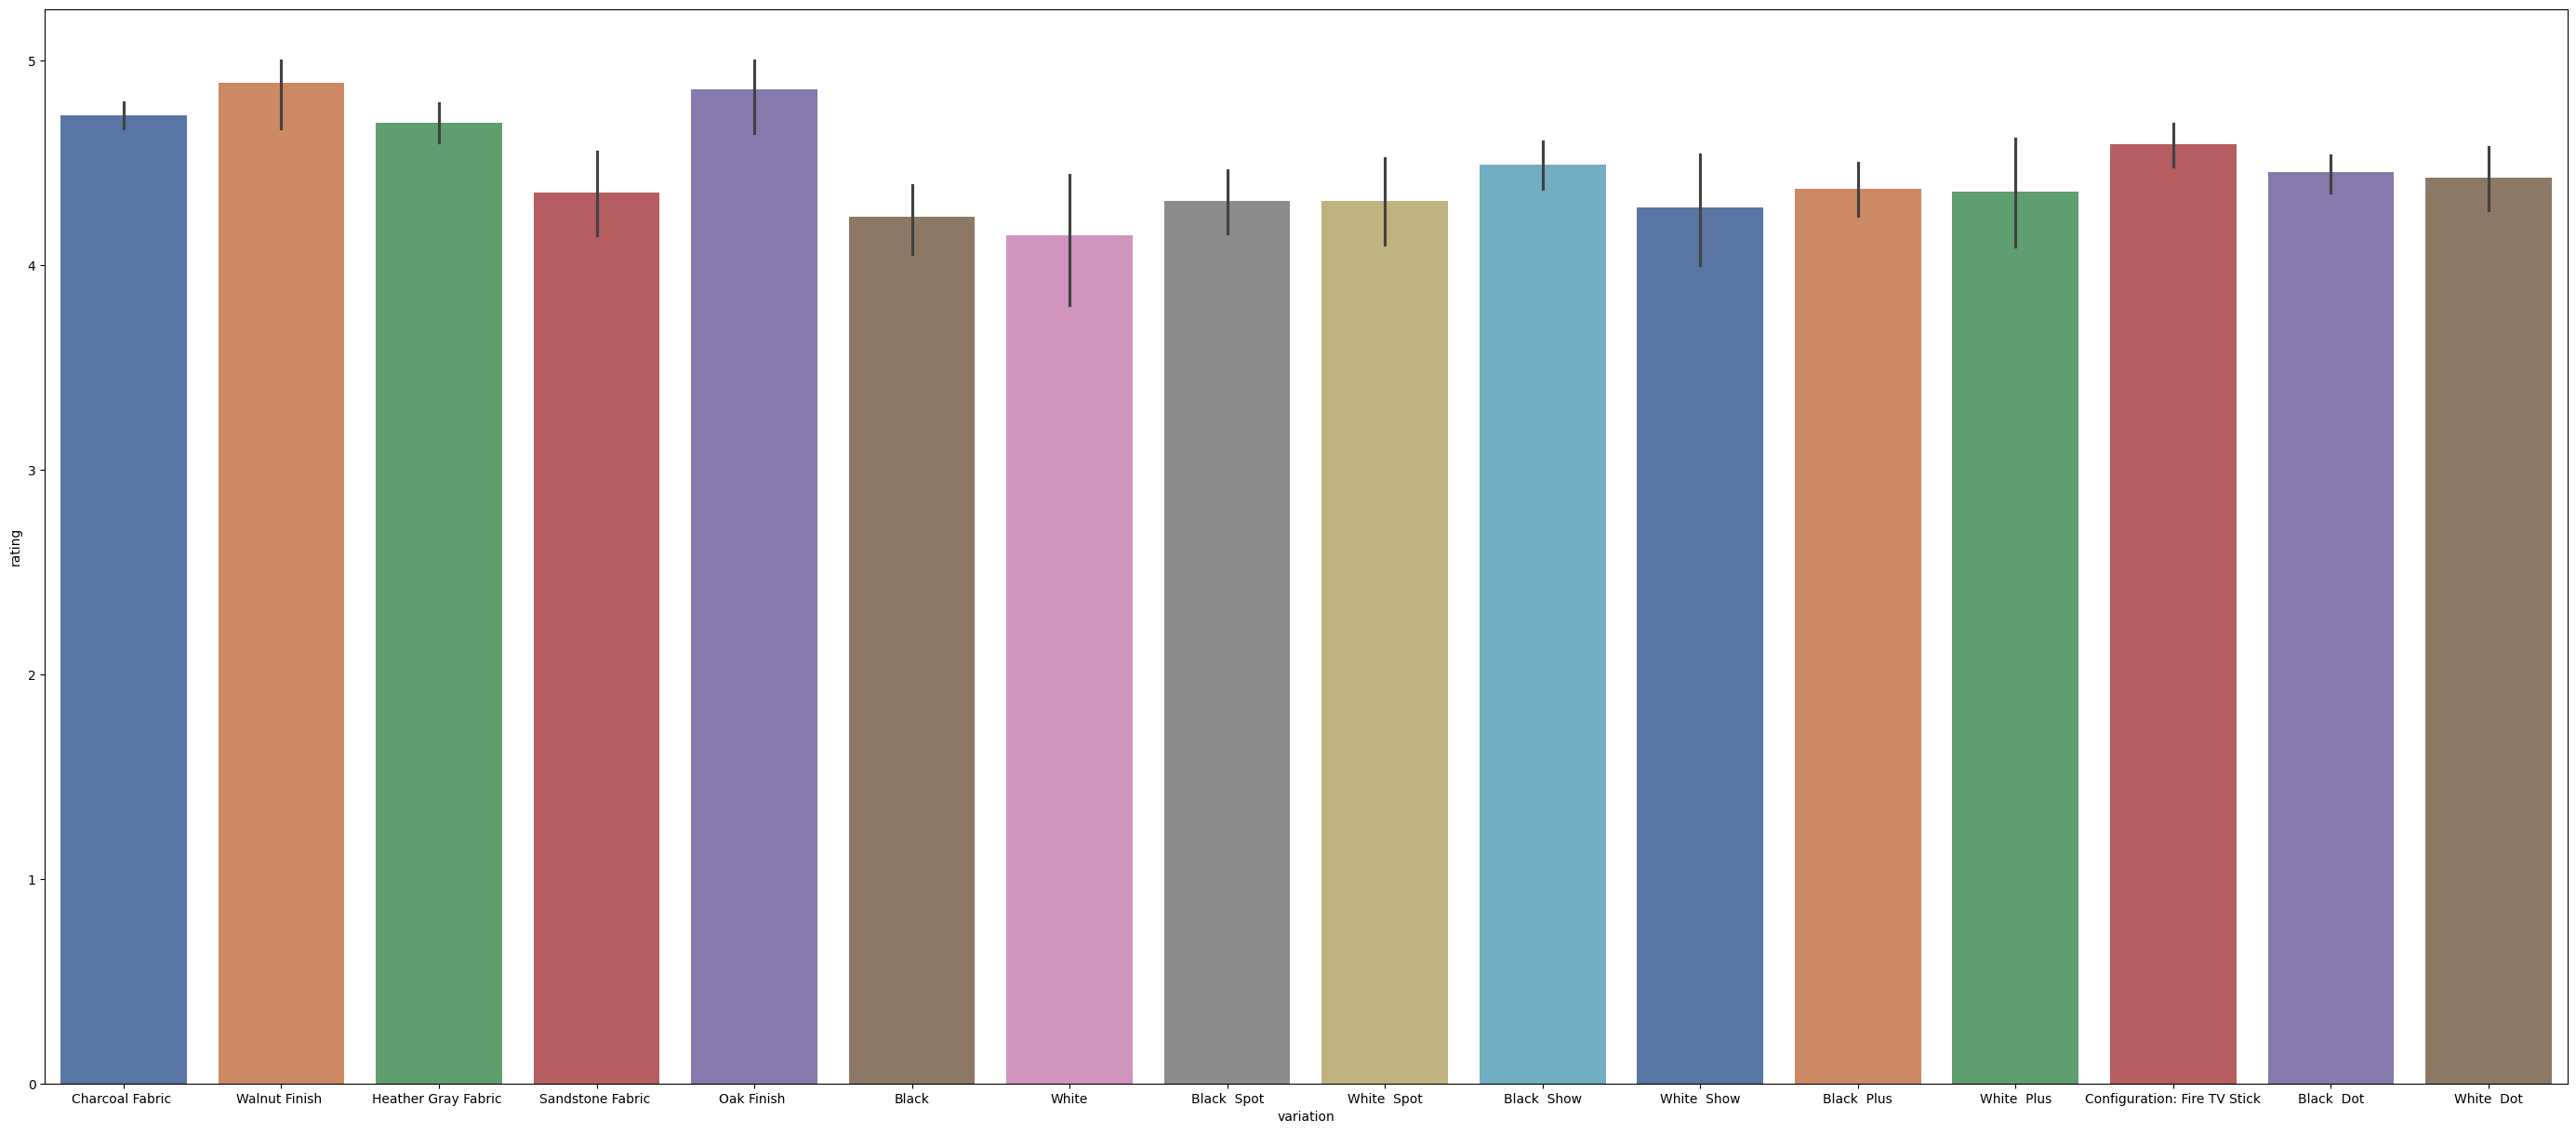

In [ ]:
#Plotting the same with ratings
plt.figure(figsize = (35,15))
sns.barplot(x = 'variation', y = 'rating', data = reviews, palette = 'deep')

Relationship between variation and feedback, and variation and rating is about the same, obviously.

It seems that most of the finishes have about the same kind of rating/feedback. The best variations are the Oak Finish and Walnut Finish, and the worst variation was the White Finish. However, rating/feedback is similar for all variations.

Now, we will plot the WordCloud to visually see the most prominent words within the dataset. This step is important in sentiment analysis to gauge the overall sentiment towards a product.

In [ ]:
sentence = reviews['verified_reviews'].astype(str).tolist() #keeping all verified reviews in a list
sentence

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [ ]:
#Now, we will connect all these sentences to create one huge string
sentences_joined = ' '.join(sentence)
sentences_joined

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

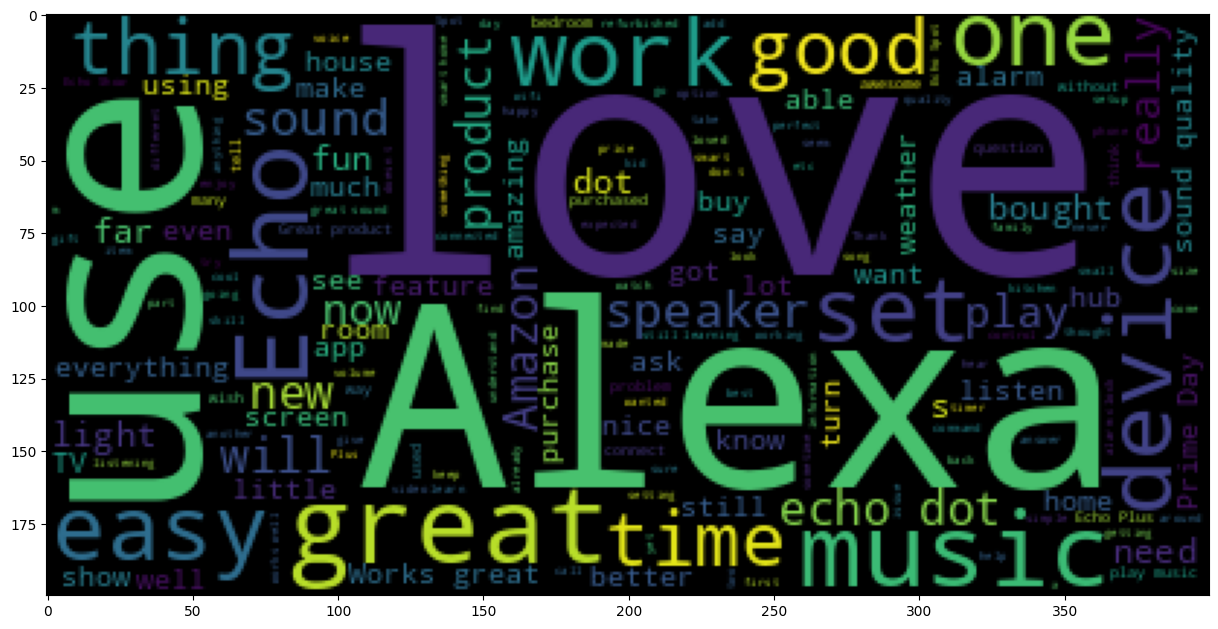

In [ ]:
#Now, we will plot our WordCloud
from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color = 'black').generate(sentences_joined)
plt.imshow(wordcloud)
#

This is a powerful tool in sentiment analysis. In a real-world situation, we can perform web scraping to get all the reviews from different sites, and the create a word cloud.

The most common words are 'love', 'Alexa', 'great', 'use', and 'music.' From this initial look, this is a good sign!

Now, we will create a WordCloud for only negative reviews, to gauge what users are complaining about.

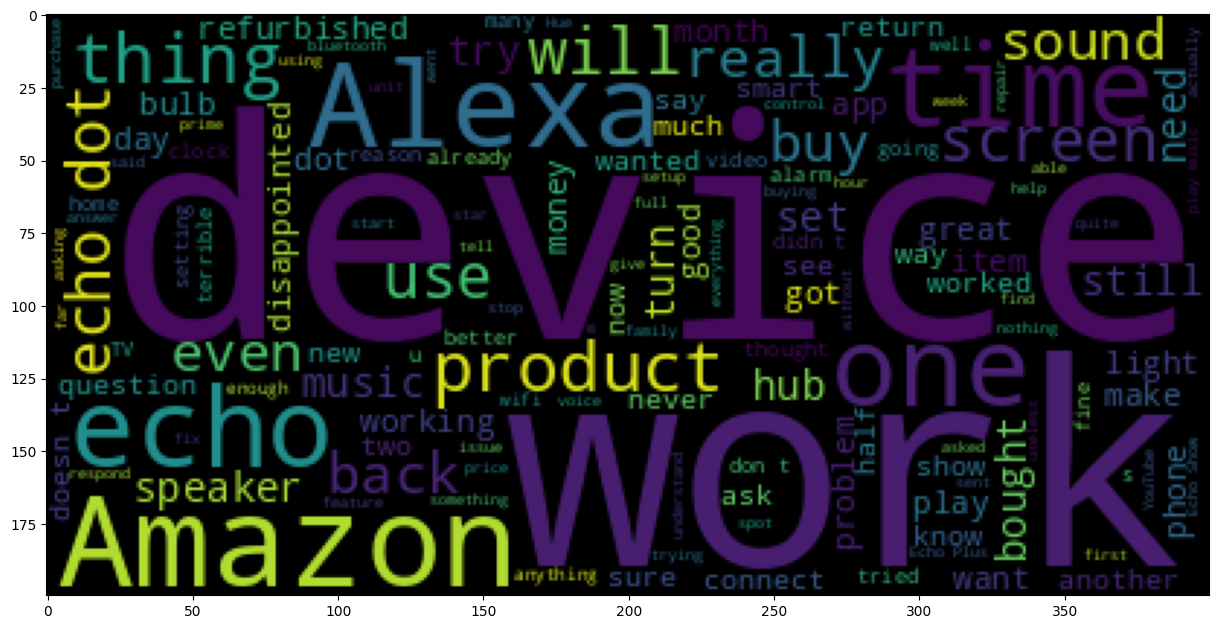

In [ ]:
sentence_negative = negative_reviews['verified_reviews'].astype(str).tolist()
negative_sentences_joined = ' '.join(sentence_negative)
negative_wordcloud = WordCloud(background_color = 'black').generate(negative_sentences_joined)
plt.figure(figsize = (15,15))
plt.imshow(negative_wordcloud)

From the lot above, we begin to see some helpful words like 'setting', 'screen', 'doesn't', 'tried', and 'disappointed.' To understand these words more, we will remove the most common words in the WordCloud, like 'device', 'Amazon', 'Alexa', and 'work.'

#Part 4: Perform Data Cleaning
We will clean up the data to make it ready to apply to our ML algorithms.

In [ ]:
#We don't need the date, so we will drop it from our dataset.
#Since the ratings and feedback are highly correlated, we will drop one of the two. This would also help us prevent the curse of dimensionality.
#So, we will drop ratings.
#For now, we will also drop the length column. We will try adding it back later to seeif the ML performance changes.
reviews = reviews.drop(['date', 'rating', 'length'], axis = 1)
reviews


,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
#Now, we will encode the variations column into numbers to feed into our ML model
#we will also put drop_first = True to avoid the dummy variable trap. The dummy variable trap occurs when we have two columns, and one column can be predicted from the other one.
variation_encoding = pd.get_dummies(reviews['variation'], drop_first= True)
variation_encoding.replace({False: 0, True: 1}, inplace=True)
variation_encoding

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Now, we will go to our reviews dataframe and drop our variation column, since we don't need it anymore (we have already encoded it)
reviews.drop(['variation'], axis = 1, inplace = True)
reviews

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [ ]:
#Now, we will concatenate the reviews data and the encoded variations data
reviews = pd.concat([reviews, variation_encoding], axis = 1)
reviews

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Part 5: Remove Punctuations from a String
In this section, we will remove punctuations from a sample string. We will eventually perform this on the 'verified_reviews' column. This is the initial step to convert our textual format into numeric format, to eventually feed into our ML model.

In [ ]:
sample_string = "Wow. I just started working on this project. I am so happy!! :)"
from string import punctuation
sample_string_no_punc = ''.join([char for char in sample_string if char not in punctuation]) #removing all punctuations in the string and joining the characters back into a string
sample_string_no_punc

'Wow I just started working on this project I am so happy '

#Part 6: Remove Stop Words from a String
Stop words are the most commonly occuring words in any text corpus, so we consider them as noise. In this section, we will remove the stop words from our sample string. This, again, will be eventually performed on the 'verified_reviews' column. This is an initial step to convert our textual format into numeric format to eventually feed into our ML model.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#print commonly occuring stop words
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Now, we will remove the stop words from our sample string without punctuations
#word.lower() to account for words like 'I'
sample_string_no_punc_no_stopwords = ' '.join([word for word in sample_string_no_punc.split() if word.lower() not in stopwords.words('english')])
sample_string_no_punc_no_stopwords
#

'Wow started working project happy'

In [ ]:
#Let's try both the above exercises on a new sample string:
new_sample_string = "These two exercises will help you work on removing both punctuations and stop words from a string. Hope you enjoy!"
new_sample_string_no_punc = ''.join([char for char in new_sample_string if char not in punctuation])
new_sample_string_no_punc_no_stopwords = ' '.join([word for word in new_sample_string_no_punc.split() if word.lower() not in stopwords.words('english')])
new_sample_string_no_punc_no_stopwords
#

'two exercises help work removing punctuations stop words string Hope enjoy'

#Part 7: Understand Tokenization (Count Vectorization)
We want to feed data into an ML classifier. We want to convert our data into a numerical format. To do this, we will apply tokenization.
1. We create a list of columns for every unique word in the strings of the whole column.
2. We will take the strings one after another, and indicate '1' if the word exists in the string, and '0' otherwise (based on the corresponding word column) and populate the word columns accordingly based on its existence in each string.

We will leverage sklearn for feature extraction and count vectorization for us.

For this exercise , let's try it first on both our sample strings from Parts 5 and 6.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_list = [sample_string, new_sample_string]
sample_list

['Wow. I just started working on this project. I am so happy!! :)',
 'These two exercises will help you work on removing both punctuations and stop words from a string. Hope you enjoy!']

In [ ]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(sample_list)
print(count_vectorizer.get_feature_names_out())
print(X.toarray()) #get corresponding tokens

['am' 'and' 'both' 'enjoy' 'exercises' 'from' 'happy' 'help' 'hope' 'just'
 'on' 'project' 'punctuations' 'removing' 'so' 'started' 'stop' 'string'
 'these' 'this' 'two' 'will' 'words' 'work' 'working' 'wow' 'you']
[[1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0]
 [0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 2]]


In [ ]:
#Let's try this on another string without sklearn
part_7_string = ['Hello World', 'Hello Hello World', 'Hello World World']
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(part_7_string)
print(count_vectorizer.get_feature_names_out())
print(X.toarray()) #get corresponding tokens

['hello' 'world']
[[1 1]
 [2 1]
 [1 2]]


#Part 8: Perform Data Cleaning Using Parts 5, 6, and 7.
Remove punctuations and stop words and perform tokenization.

In [ ]:
def sentence_cleaning(sentence):
  #remove punctuations
  sentence_punc_removed = ''.join([char for char in sentence if char not in punctuation])
  #remove stopwords
  sentence_punc_stopwords_removed = ' '.join([word for word in sentence_punc_removed.split() if word.lower() not in stopwords.words('english')]) # Join the words back into a string
  #return cleaned sentence
  return sentence_punc_stopwords_removed

In [ ]:
#Testing sentence_cleaning() function
reviews_clean = reviews['verified_reviews'].astype(str).apply(sentence_cleaning)
reviews_clean
#

0                                               Love Echo
1                                                   Loved
2       Sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaurs contro...
4                                                   Music
                              ...                        
3145                         Perfect kids adults everyone
3146    Listening music searching locations checking t...
3147    love things running entire home TV lights ther...
3148    complaint sound quality isnt great mostly use ...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
reviews_tokens = count_vectorizer.fit_transform(reviews_clean)
reviews_tokens

<3150x4382 sparse matrix of type '<class 'numpy.int64'>'
	with 37056 stored elements in Compressed Sparse Row format>

In [ ]:
print(count_vectorizer.get_feature_names_out()) #get feature names

['072318' '10' '100' ... 'zzzz' 'zzzzzzz' 'útil']


In [ ]:
print(reviews_tokens.toarray()) #get corresponding tokens

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Let's prepare our training data for the ML model
reviews_tokens.shape

(3150, 4382)

In [ ]:
#Now, we will get our tokenized forms instead of verified_reviews in the reviews dataset
reviews.drop(['verified_reviews'], axis = 1, inplace = True)
reviews

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Now, we will take our encoded reviews and copy it into the dataframe format
reviews_encoded = pd.DataFrame(reviews_tokens.toarray())
reviews_encoded

,0,1,2,3,4,5,6,7,8,9,...,4372,4373,4374,4375,4376,4377,4378,4379,4380,4381
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Finally, we will concatenate reviews and reviews_encoded
reviews = pd.concat([reviews, reviews_encoded], axis = 1)
reviews

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4372,4373,4374,4375,4376,4377,4378,4379,4380,4381
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we have numerical data only. We will now prepare our training data for the ML model.

In [ ]:
X = reviews.drop(['feedback'], axis = 1)
y = reviews['feedback']

#Part 9: Understand Naive Bayes Classification
1. The Naive Bayes classifier is a predictive modeling technique based on Bayes' Theorem.
2. It involves computing two key components: the prior probability, which is an initial estimate of classifying a data point into a particular category without considering its features, and the likelihood, which is the probability of classifying a data point into a category based on the features of nearby data points.
3. These two elements, the prior probability and likelihood, are integrated to determine the posterior probability according to Bayes' Theorem. A data point is assigned to the class for which it has the highest posterior probability.
4. In essence, the posterior probability is calculated as the product of the likelihood and the class's prior probability, divided by the marginal likelihood.
5. The classification of a data point is ultimately based on which class has the greatest posterior probability.



#Part 10: Train a Naive Bayes Classifier Model



In [ ]:
X.shape #shape of input - we have 4397 features after encoding variations and reviews text

(3150, 4397)

In [ ]:
y.shape

(3150,)

In [ ]:
#Train the classifier model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [ ]:
#import naive bayes classifier

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)


from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

#Part 11: Perform and Assess Predictions Using Trained Model


In [ ]:
#Assess trained model
from sklearn.metrics import classification_report, confusion_matrix
y_pred_train = nb.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71       210
           1       0.96      1.00      0.98      2310

    accuracy                           0.96      2520
   macro avg       0.95      0.78      0.84      2520
weighted avg       0.96      0.96      0.96      2520



In [ ]:
print(confusion_matrix(y_train, y_pred_train))

[[ 120   90]
 [   9 2301]]


<Axes: >

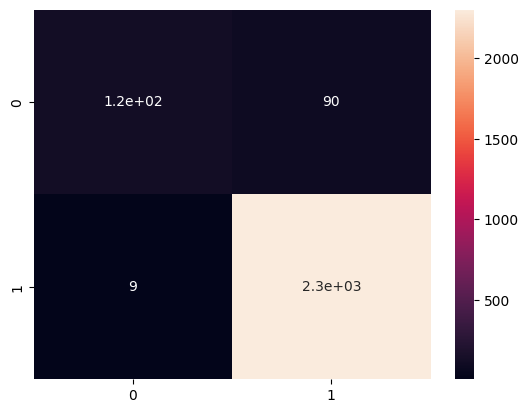

In [ ]:
conf_mat_hm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_mat_hm, annot = True)

In [ ]:
#Let's print the classification report for test data
X_test.columns = X_test.columns.astype(str)
y_pred_test = nb.predict(X_test)
print(classification_report(y_test, y_pred_test))
#precision and recall for class 1 are 0.95 and 0.98 respectively. The recall value for class 0 is very poor.
#f1-values for class 0 and class 1 are 0.42 and 0.96 respectively.

              precision    recall  f1-score   support

           0       0.55      0.34      0.42        47
           1       0.95      0.98      0.96       583

    accuracy                           0.93       630
   macro avg       0.75      0.66      0.69       630
weighted avg       0.92      0.93      0.92       630



<Axes: >

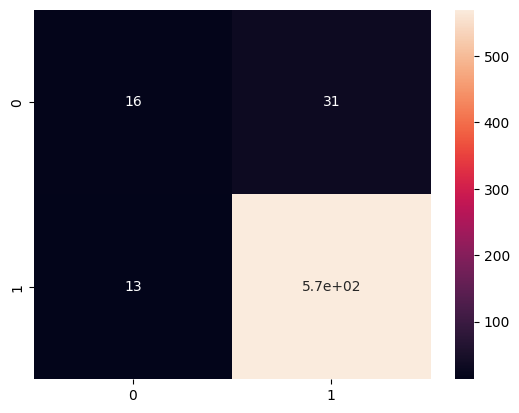

In [ ]:
conf_mat_hm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_mat_hm_test, annot = True)
# Here, we have classified most samples pretty well. However, this data is an unbalanced dataset, since most reviews are positive. Therefore, most reviews (570) are correctly classified, while 13+31+16 = 60 have been misclassified.

#Part 12: Understand Logistic Regression Classifier
1. Logistic Regression is a statistical method used for binary classification, which predicts the probability of a data point belonging to one of two possible categories.
2. The technique uses a logistic function to model the probability that a given input belongs to the default class, which can be expressed as a value between 0 and 1. This function estimates the odds of the occurrence of an event by fitting data to a logistic curve.
3. It calculates the relationship between the dependent binary variable and one or more independent variables by estimating probabilities using a logistic function, which is typically a sigmoid curve.
4. The outcome is then transformed into a binary decision using a threshold value, typically 0.5, where probabilities above this threshold are classified as one class, and those below are classified as the other.
5. Logistic Regression is particularly useful for cases where the relationship between the independent variables and the dependent variable is not linear, allowing for more complex relationships to be modeled.

#Part 13: Train and Assess the Logistic Regression Classifier
Let's fit the logistic regression classifier model to our data, make corresponding predictions, and assess the performance of our model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#make predictions:
y_pred = lr.predict(X_test)

In [ ]:
y_pred #these are the model predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#print overall accuracy of the model
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
#We have achieved 95% accuracy on the test data, which is great

Accuracy: 95.08%


<Axes: >

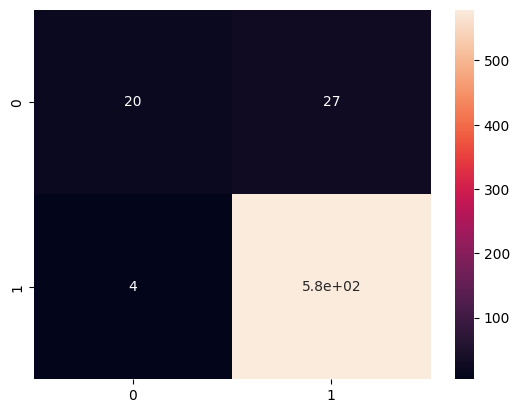

In [ ]:
#creating a heatmap on the confusion matrix
conf_mat_hm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat_hm_lr, annot = True)
#Only 51 reviews have been misclassified. So, logistic regression has better results than the naive bayes classifier.

In [ ]:
print(classification_report(y_test, y_pred))
#the precision of class 0 is much better than that achieved in Naive Bayes. Even [recision and recall for class 1 is better in this model.]

              precision    recall  f1-score   support

           0       0.83      0.43      0.56        47
           1       0.96      0.99      0.97       583

    accuracy                           0.95       630
   macro avg       0.89      0.71      0.77       630
weighted avg       0.95      0.95      0.94       630

